## Exploring the datasets


In [1]:
!pip install transformers

     |████████████████████████████████| 1.3MB 9.1MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 890kB 39.5MB/s 
     |████████████████████████████████| 2.9MB 42.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a9adfbc92edd34cae0b591d9ffa98a25d7792a90c7277b6e546d1957eccb3f00
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [58]:
import transformers
from transformers import BertTokenizer

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style= 'whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 10, 6


### REAL and FAKE news dataset

Source: https://www.kaggle.com/nopdev/real-and-fake-news-dataset

In [3]:
!unzip news.csv.zip

Archive:  news.csv.zip
  inflating: news.csv                


In [59]:
df = pd.read_csv ('news.csv')

In [60]:
df.sample(5)

,Unnamed: 0,title,text,label
1357,9957,"American Dream, Revisited",Will Trump pull a Brexit times ten? What would...,FAKE
2080,7596,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
2718,8905,The FBI Can’t Actually Investigate a Candidate...,Dispatches from Eric Zuesse This piece is cros...,FAKE
812,8752,Confirmed: Public overwhelmingly (10-to-1) say...,Print \n[Ed. – Every now and then the facade c...,FAKE
4886,7804,Nanny In Jail After Force Feeding Baby To Death,Nanny In Jail After Force Feeding Baby To Deat...,FAKE


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [33]:
token_lens = []

for txt in df.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


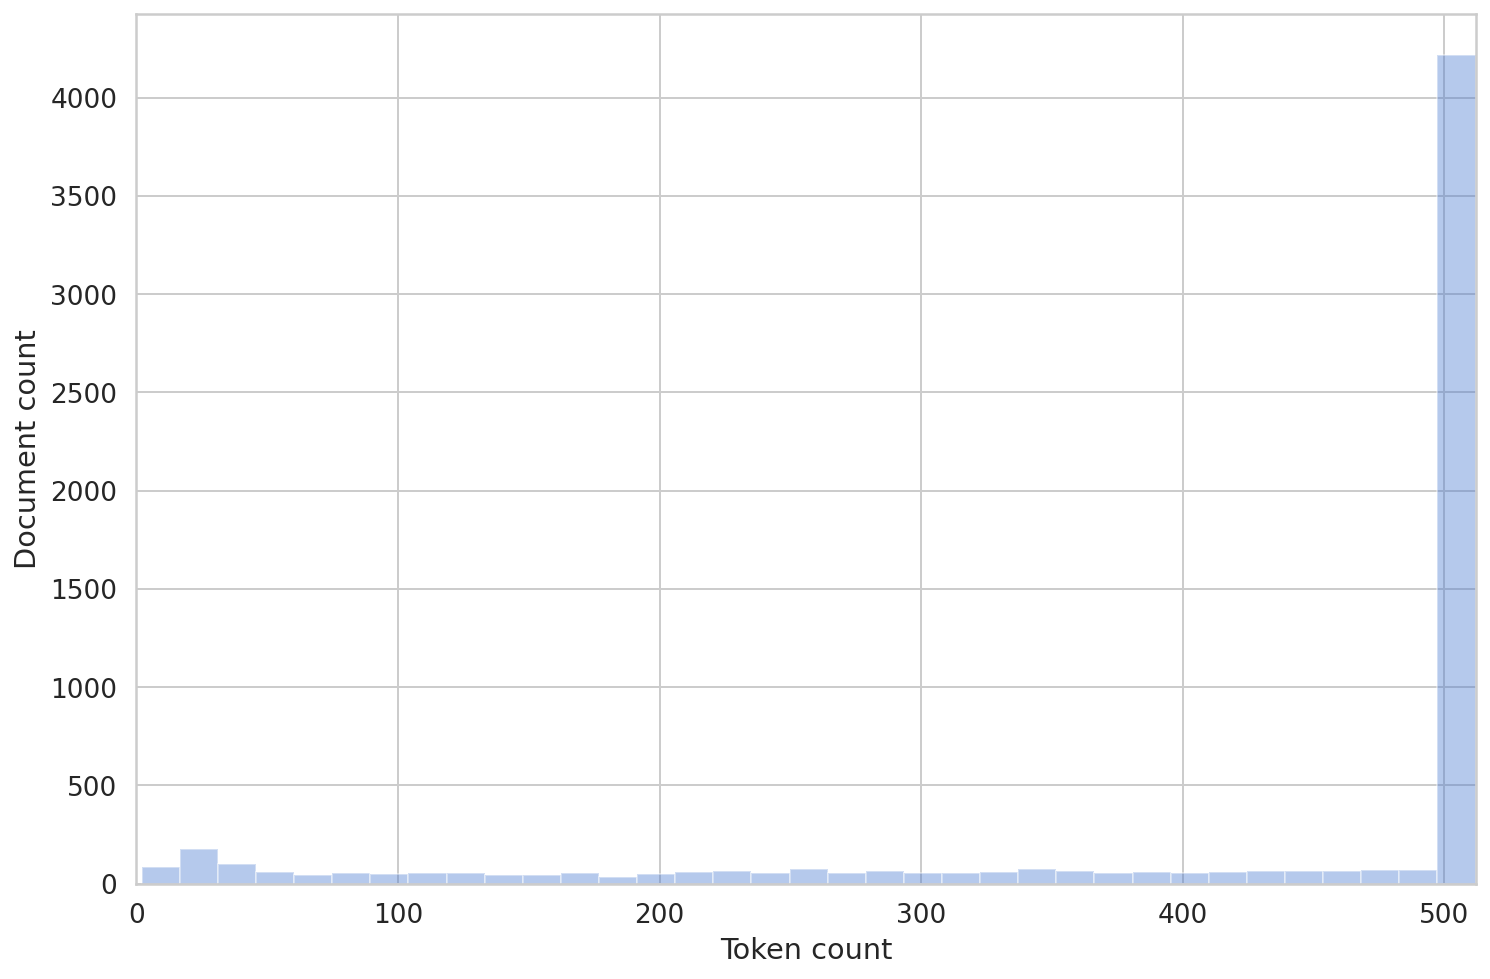

In [41]:
sns.distplot(token_lens, kde=False, norm_hist = False)
plt.xlim([0, 512]);
plt.xlabel('Token count');
plt.ylabel('Document count');

In [44]:
token_lens = []

for txt in df.text:
  tokens = word_tokenize(txt)
  token_lens.append(len(tokens))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


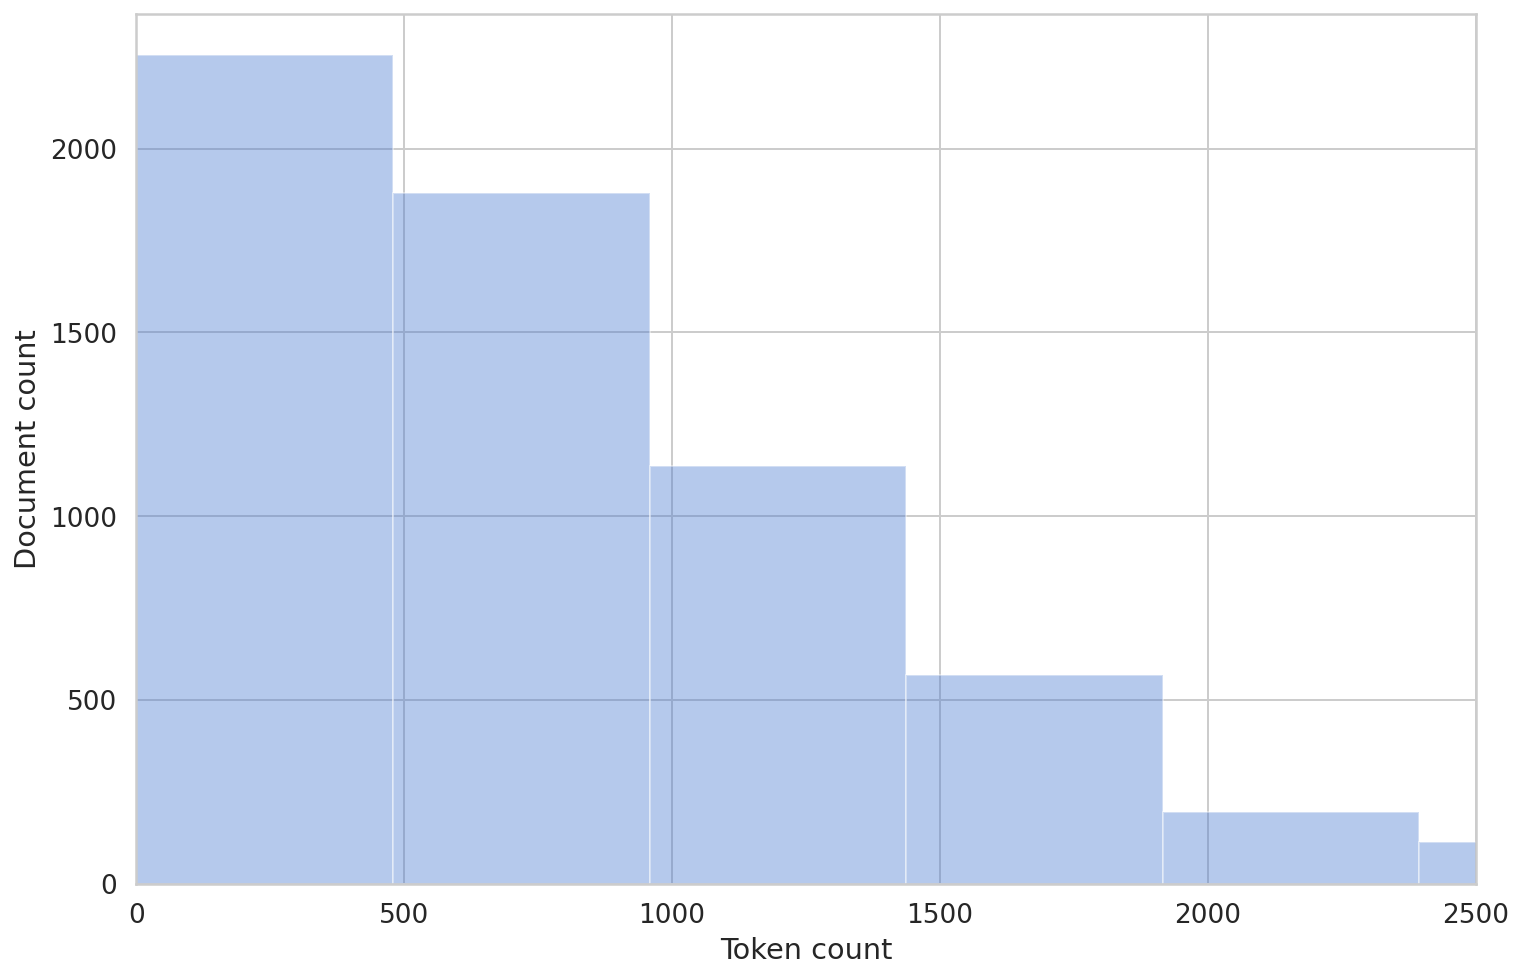

In [46]:
sns.distplot(token_lens, kde=False, norm_hist = False)
plt.xlim([0, 2500]);
plt.xlabel('Token count');
plt.ylabel('Document count');

### BBC News Datasets

- [Dataset Original Source](http://mlg.ucd.ie/datasets/bbc.html)
- [miguelfzafra](https://github.com/miguelfzafra)
 created a csv file from this dataset with an R script. The script can be found [here](https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/01.%20Dataset%20Creation/01.%20Dataset%20Creation.R). We used his extracted file form [here](https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/01.%20Dataset%20Creation/News_dataset.csv)

In [ ]:
# !unzip News_dataset.csv.zip

In [54]:
df = pd.read_csv('News_dataset.csv', sep=';')
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


In [53]:
df.columns

Index(['File_Name', 'Content', 'Category', 'Complete_Filename'], dtype='object')

In [55]:
df.Category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


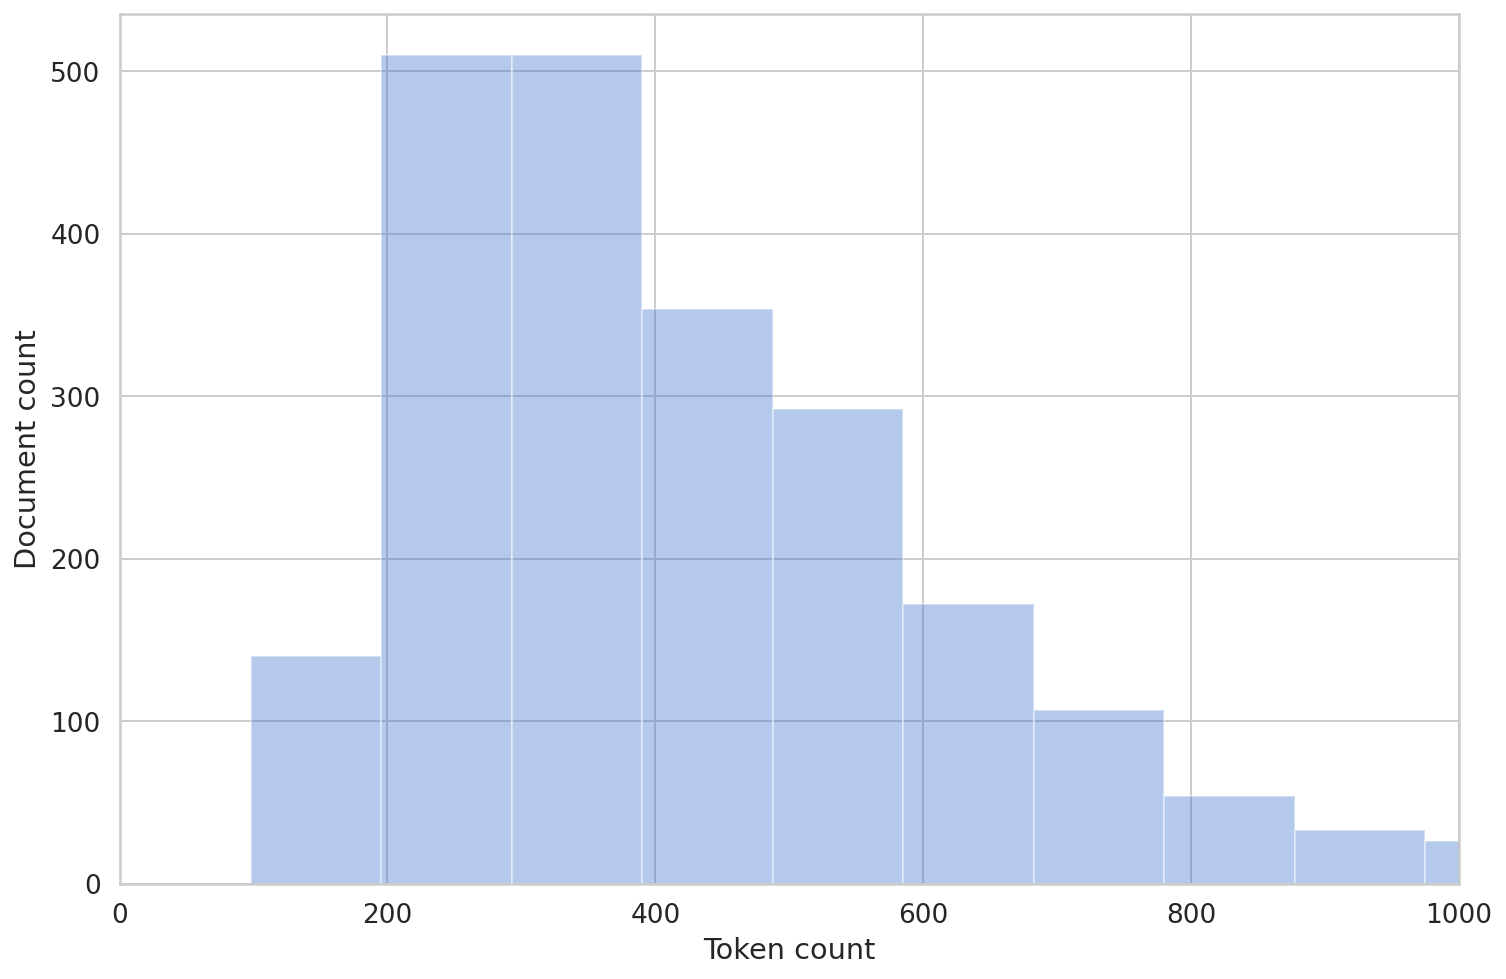

In [57]:
token_lens = []

for txt in df.Content:
  tokens = word_tokenize(txt)
  token_lens.append(len(tokens))

# for txt in df.Content:
#   tokens = tokenizer.encode(txt, max_length=512)
#   token_lens.append(len(tokens))

sns.distplot(token_lens, kde=False, norm_hist = False)
plt.xlim([0, 1000]);
plt.xlabel('Token count');
plt.ylabel('Document count');

**Classes are almost balanced in both datasets**